In [61]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
!pip install textblob
!pip install tweepy
!pip install wordcloud


In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import tweepy
import wordcloud

In [3]:
tweets = pd.read_csv('all_tweets.csv')

In [4]:
tweets.head(5)

,Unnamed: 0,sentiment,text,user,label
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety


In [5]:
tweets['text'].head()

0    RT @SchudioTv: Want to know more about #autism...
1    We blame ourselves and feel worse. Start with ...
2    RT @PsychiatristCNS: 130,000 patient years and...
3    RT @SkypeTherapist: See a therapist online ove...
4    RT @PsychiatristCNS: 130,000 patient years and...
Name: text, dtype: object

In [6]:
tweets['combined']=tweets['sentiment'].astype(str)+', '+tweets['label']


In [7]:
tweets

,Unnamed: 0,sentiment,text,user,label,combined
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety,"positive, anxiety"
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety,"negative, anxiety"
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety,"positive, anxiety"
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety,"neutral, anxiety"
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety,"positive, anxiety"
...,...,...,...,...,...,...
6027,93,negative,"RT @EssBee_Alias: 2/3\nI noticed something,tho...",FromOneLine,stress,"negative, stress"
6028,94,negative,Was there a collective bad day today? Everyone...,lumieart,stress,"negative, stress"
6029,95,positive,wen i’m sad I literally got no one to talk to ...,_floracostaa,stress,"positive, stress"
6030,96,positive,@AustinTweets3 @BirdsPhan228 @Stephfortrump1 @...,Exreenx,stress,"positive, stress"


In [8]:
tweets.drop(columns=['combined'], inplace=True)

In [9]:
tweets

,Unnamed: 0,sentiment,text,user,label
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety
...,...,...,...,...,...
6027,93,negative,"RT @EssBee_Alias: 2/3\nI noticed something,tho...",FromOneLine,stress
6028,94,negative,Was there a collective bad day today? Everyone...,lumieart,stress
6029,95,positive,wen i’m sad I literally got no one to talk to ...,_floracostaa,stress
6030,96,positive,@AustinTweets3 @BirdsPhan228 @Stephfortrump1 @...,Exreenx,stress


In [10]:
#data = tweets.loc[tweets["sentiment"] != 'neutral']

In [11]:
#data

##### Clean the text

In [12]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

tweets['text'] = tweets['text'].apply(cleanTxt)


    

In [13]:
tweets

,Unnamed: 0,sentiment,text,user,label
0,0,positive,: Want to know more about autism and anxiety? ...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,": 130,000 patient years and the diagnostic sta...",ThinkNeha,anxiety
3,3,neutral,: See a therapist online over Skype - Learn Ho...,FrankCoulson7,anxiety
4,4,positive,": 130,000 patient years and the diagnostic sta...",Phcourtet,anxiety
...,...,...,...,...,...
6027,93,negative,"_Alias: 2/3\nI noticed something,though;w/each...",FromOneLine,stress
6028,94,negative,Was there a collective bad day today? Everyone...,lumieart,stress
6029,95,positive,wen i’m sad I literally got no one to talk to ...,_floracostaa,stress
6030,96,positive,_a_mess_2020 Oh wow more stuff proving you...,Exreenx,stress


In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [15]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
tweets['subjectivity'] = tweets['text'].apply(getSubjectivity)

In [17]:
tweets['polarity'] = tweets['text'].apply(getPolarity)

In [18]:
tweets

,Unnamed: 0,sentiment,text,user,label,subjectivity,polarity
0,0,positive,: Want to know more about autism and anxiety? ...,beyondbehaviour,anxiety,0.400000,0.250
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety,0.600000,-0.400
2,2,positive,": 130,000 patient years and the diagnostic sta...",ThinkNeha,anxiety,0.350000,0.050
3,3,neutral,: See a therapist online over Skype - Learn Ho...,FrankCoulson7,anxiety,0.000000,0.000
4,4,positive,": 130,000 patient years and the diagnostic sta...",Phcourtet,anxiety,0.350000,0.050
...,...,...,...,...,...,...,...
6027,93,negative,"_Alias: 2/3\nI noticed something,though;w/each...",FromOneLine,stress,0.500000,0.500
6028,94,negative,Was there a collective bad day today? Everyone...,lumieart,stress,0.841667,-0.525
6029,95,positive,wen i’m sad I literally got no one to talk to ...,_floracostaa,stress,1.000000,0.050
6030,96,positive,_a_mess_2020 Oh wow more stuff proving you...,Exreenx,stress,0.750000,0.300


##### Plot word cloud

In [19]:
all_words = ' '.join( [ twts for twts in tweets['text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

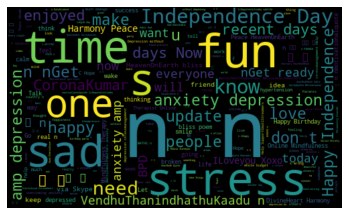

In [20]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

##### Check the accuracy of negativ, neutral and positive analysis values that have been provided.

In [21]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Analysis'] = tweets['polarity'].apply(getAnalysis)

In [22]:
tweets.head(20)

,Unnamed: 0,sentiment,text,user,label,subjectivity,polarity,Analysis
0,0,positive,: Want to know more about autism and anxiety? ...,beyondbehaviour,anxiety,0.400000,0.250000,Positive
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety,0.600000,-0.400000,Negative
2,2,positive,": 130,000 patient years and the diagnostic sta...",ThinkNeha,anxiety,0.350000,0.050000,Positive
3,3,neutral,: See a therapist online over Skype - Learn Ho...,FrankCoulson7,anxiety,0.000000,0.000000,Neutral
4,4,positive,": 130,000 patient years and the diagnostic sta...",Phcourtet,anxiety,0.350000,0.050000,Positive
5,5,neutral,The onset of the pandemic &amp; WFH has led to...,ajhospitalmng,anxiety,0.000000,0.000000,Neutral
6,6,neutral,Climate change is concerning. \n\nThese can cr...,585Mentalhealth,anxiety,0.000000,0.000000,Neutral
7,7,positive,"130,000 patient years and the diagnostic stabi...",PsychiatristCNS,anxiety,0.350000,0.050000,Positive
8,8,neutral,Looking for online counseling via Skype? Skype...,SkypeTherapist,anxiety,0.000000,0.000000,Neutral
9,9,neutral,: Just sharing my thoughts😊 @_lgtwo Trending...,TrioMinutes,anxiety,0.000000,0.000000,Neutral


In [23]:
tweets.drop(columns=['sentiment'], inplace=True)

##### Print all the positive tweets

In [24]:
j = 1
sortedDF = tweets.sort_values(by=['polarity'])
for i in range (0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['text'][i])
        print()
        j=j+1

1) : Want to know more about autism and anxiety? Watch this short clip below...\n\nClick here to enrol ➡️ 

2) : 130,000 patient years and the diagnostic stability of BipolarDisorder: Study finds frequent dx shifts related to BD,…

3) : 130,000 patient years and the diagnostic stability of BipolarDisorder: Study finds frequent dx shifts related to BD,…

4) 130,000 patient years and the diagnostic stability of BipolarDisorder: Study finds frequent dx shifts related to B… 

5) Many of us are likely to feel anxious or stressed at work occasionally, however, if your anxiety is constant or inc… 

6) : My anxiety always makes me very self critical, so positive affirmations and self validation is something I’m learning to do…

7) : Woke up to this email. Thanks to everyone who reached out. mentalhealth bipolar anxiety OCD 

8) “I found a cure for my anxiety. It turns out, all I need is for everyone to tell me they’re not mad at me every fif… 

9) : Is this the most MentalHealth +ve\n BelowDec

677) : Ready to wing it on a Sailboards Maui wing foil board. \n.\n.\n.\n.\nfoil foiling hydrofoil fencing sup surf loya…

678) ＧＯＬＤ ＡＮＤ ＧＯＲＧＥＯＵＳ！\n⭐⭐⭐\nShop our newest range of Vellies online (Link in Bio) 🥰\nMILKANDHONEY smile model like… 

679) Go where you feel most alive. \n\nleh Ladakh biker  roadtrip india  travel himalayan lehladakh mountains… 

680) Target your Right Audience DigitaMarketingWorksAgency in Hyderabad.\n digitalmarketingworkers… 

681) Do you know!!!\nSalak plantbased vitamins healthylifestyle healthy healthyfood healthyliving food fruits… 

682) : But wait, there's more! \n/r/dankmemes\n\nmeme memes funny dankmemes memesdaily funnymemes lol follow humor like…

683) myself ootd happy instalike moda fashionblogger cute photo followforfollowback bhfyp Holiday2020⁣… 

684) : 50x70cm abstrakt love art  Lifestyle music  germanartist artists musiker view kuenstler kunst artist amazi…

685) 50x70cm abstrakt love art  Lifestyle music  germanartist artists musiker view ku

1046) Congratulations  winning 2nd place in The National Finals, runners up is great testament to the hard work,… 

1047) Let’s celebrate our past glories and achievements today! Happy 91stNationalDay, Kingdom of SaudiArabia  \n \nنحتف… 

1048) : Head in the clouds.... that one 🌥 what a perfect cake for the dreamer in your life.   You'll find fluffy buttercream cl…

1049) Wishing Dr. Lindsay a HAPPY BIRTHDAY TODAY!\n\ndfcadent drlindsaybedeaux happybirthday birthday celebrate… 

1050) : Happy Bisexual Awareness Week! 🙌 biweek happens each September and runs this year from the 16th to the 23rd! Join us i…

1051) Happy Bisexual Awareness Week! 🙌 biweek happens each September and runs this year from the 16th to the 23rd! Join… 

1052) Today at CMR Group we are wishing  Amin Isat a very Happy Birthday! 😀\n\nFrom the team at CMR Group we hope you have… 

1053) : Happy National Nanny Recognition Week!\n❤Celebrating All Nannies ❤\nnannies nanny celebrate innrw professionals EYTalk…

1054) Hap


1542) In a gentle way, you can shake the world.\n\nD'une manière douce, vous pouvez secouer le monde.\n\nafrica children… 

1543) _VN: Here's the original full picture of  in hanbok (with low quality 🥲) everyone. Hope y'all will have a happy Chuseok…

1544) Have a great one!\n\nmonday mondaymotivation hellomonday design photography photooftheday photographer art… 

1545) Little Fur baby with young cute Lucy   cute love instagood beautiful like happy… 

1546) Happy Monday🙂 Have a great week ahead🤸‍♀️\n\nhappymonday mondaymotivation mondayvibes happy motivation newweek… 

1547) _heneciatwt: ‘Prism Time' - Hear the forest🎤 henecia prismtime happy thankyou 

1548)  SBS etsy SmallBusiness happy \nWelcome in my small business.\nBeautiful handmade tulle skirt .\nBust… 

1549) -  photography photooftheday love instagood instagram like photo picoftheday follow… 

1550)  smile instagood happy love fun smilesmilesmile smilemore smiling like smileeveryday instasmile… 

1551) : attitude love  phot

2052) : Following the latest announcement, I now see people who got AZ and waiting for 2nd dose asking for shorter interval. The int…

2053) : “let’s have fun and talk a lot on weverse blink” 🧍‍♀️😭 they all dipped already 

2054)  it’s so fun so fly so fresh

2055) : 💌 12.33PM\n\nWhatever it is just have fun, be brilliant, be unique, make it weird hahaha I’ll give it a go too~

2056) : Karma is a bitch!  The same way you made somebody feel it’ll come back on you, maybe 10 times harder. Better be careful wha…

2057) : Day 10 of making Twitter fun again! If you want/don’t want to be tagged in these let me know! Just trying to give a litt…

2058) Cotton Quilt Fabric Pinwheel Floral Medallions Fun C4766-Dove Multi  

2059)   LA seems fun

2060) : Idk why air signs think that interrupting people mid sentence because they just had a new thought is a fun personality qui…

2061) : I can't watch Lu right now, but you can!! Stop by her stream, its so chill there and she's a lot of fun :DD

2062)

2541) : ~ Reorganised my red velvet collection \n  💙💚💗💛💜\n reveluv redvelvet seulgi yeri joy wendy irene queendom 

2542) : While I’m waiting for new articles / posts about JOY's drama  OOP, I will translate comments under some videos. Which one sh…

2543) JOY  

2544) Waking up on this CelebrateMonday &amp; feeling very Grateful A new beginning, to a new week! Let’s fill it with Joy… 

2545) : [POST] — Translation \n\nDalgona did a post about fashion items that would look good on JOY ! \n\nTitle : High Teen Looks recom…

2546) _l: Each more beautiful than the last... Pink perception 😍 DailyDahlia dahlias dahlialove GardeningTwitter gardening positiv…

2547) : ~ Reorganised my red velvet collection \n  💙💚💗💛💜\n reveluv redvelvet seulgi yeri joy wendy irene queendom 

2548) : ~ Reorganised my red velvet collection \n  💙💚💗💛💜\n reveluv redvelvet seulgi yeri joy wendy irene queendom 

2549) spring it’s such a special time of the year. Such a beautiful sight, makes everyone feel good hanging

In [25]:
j = 1
sortedDF = tweets.sort_values(by=['polarity'], ascending = 'FALSE')
for i in range (0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['text'][i])
        print()
        j=j+1

1) We blame ourselves and feel worse. Start with self-compassion. We deserve it. 💜\n\nSelfLoveIsTheBestLove selflove… 

2) We are still inside buildings and often in small unventilated rooms … tight corridors, again unventilated  :( covid anxiety

3) Going Back To School can be scary for both children and parents😨\n\nWe have created a handbook with information and t… 

4) Depression, bipolar disorder, and anxiety share a common gut bacteria \n Depression Anxiety… 

5) Depression, bipolar disorder, and anxiety share a common gut bacteria 

6) Can anyone give me ideas of what to draw rn? I am currently having a small anxiety attack and I need to distract my… 

7) : It's completely normal to find yourself feeling anxious or worried after the death of someone close. 💜\n\nAnxiety can feel di…

8) : EMMERDALE star Danny Miller  who plays bad boy Aaron Dingle has opened up to fans on SocialMedia to discuss…

9) ErectileDysfunction is common in men over 40. It's usually nothing to worry about 

175) _ed: Low coronary flow relative to myocardial mass predicts heart failure in symptomatic hypertensive patients with no obstructive C…

176) _ed: Low coronary flow relative to myocardial mass predicts heart failure in symptomatic hypertensive patients with no obstructive C…

177) _ed: Low coronary flow relative to myocardial mass predicts heart failure in symptomatic hypertensive patients with no obstructive C…

178) In today’s podcast, we discuss the basics of pediatric hypertension—including common causes, risk factors, screeni… 

179) Drug treatment is often necessary in people with hypertension for whom lifestyle changes are not enough or not effective.

180) A Single Dose of Metformin Cuts Heart Attack Size in Half\n\n cardiovascular… 

181) _ed: Low coronary flow relative to myocardial mass predicts heart failure in symptomatic hypertensive patients with no obstructive C…

182) _ed: Low coronary flow relative to myocardial mass predicts heart failure in symptomatic hypertensi

266) JUST SAD OR DEPRESSED?\nsad sadness sadnessandsorrow sadnes sadnees depression depressionhelp… 

267) : Depression is a common and treatable illness. Period. Don’t let stigma or depression itself convince you it’s a person…

268) What Is the Relationship Between Hearing Loss and Dementia and Mental Health?\n\nmentalhealth mentalhealthmatters… 

269) : Depression is a common and treatable illness. Period. Don’t let stigma or depression itself convince you it’s a person…

270) All while virtually supported by me, an expert on hypermobility and other complex conditions, along with a thriving… 

271) Depression is a common and treatable illness. Period. Don’t let stigma or depression itself convince you it’s a per… 

272) You're pushing and pulling me down to you\nBut I don't know what I want\nNo I don't know what I want\n\nParemore… 

273) Instead, I'd have some memories\nFor the days I don't feel anything\nAt the least, they will remind me\nNot to make th… 

274) Feels like I'm waki

420) Blessed are ye, when men shall revile you, and persecute you, and shall say all manner of evil against you falsely… 

421) : Limited Twitter updates as we broadcast today's game. \n\nListen NOW to  at Bridgewater on Rejoice 101.3 FM/9…

422) Limited Twitter updates as we broadcast today's game. \n\nListen NOW to  at Bridgewater on Rejoice 101.3… 

423) Yoooo! 💃🕺\nIt’s Going down Already!\nThem Burst me for house with gifts and Cakes o, Early Mor Mor! 🤣😂🤣😂🤣\n.\n.\n.\n.\n.\n.… 

424) : Been a pleasure walking with these students for the past two years. Wishing them all the luck in the future celebrate le…

425) Been a pleasure walking with these students for the past two years. Wishing them all the luck in the future… 

426) As our boss, you have given us inspiration and guidance every step of the way. You deserve a long and fulfilling li… 

427) ↓ PARTY PRICE = 1,03\n�� Rank = 4751\n⏫ 24-hour: ⏬\nLow: 1,02\nHigh: 1,41\nCHANGING = -7,21 ▅▃▁ \n▼ BELOW 30-day averag… 

428) : “Alien 2

506) I've decided that Celestia will probably be my last game with a flexible personality. As fun as War of Roses and Ce… 

507) you gotta be lame bitch to see ya nigga havin fun on the game n tell him get off

508) : I ate all my fun groceries and now just have boring groceries left 😔

509)  i think i watched the first ep then i searched up the creator for fun then i was v disappointed i stopped… 

510) education accra jhs ghana africa globaledu igcse secondary school accraghana innovation westafrica… 

511) education accra jhs ghana africa globaledu igcse secondary school accraghana innovation westafrica… 

512) education accra jhs ghana africa globaledu igcse secondary school accraghana innovation westafrica… 

513) Woke up feeling down since you know our team lost horribly, then a client confirmed a shoot for the next weekend an… 

514) Todays first meal is a bacon, egg, feta, avocado, &amp; almond salad. Meanwhile, I’ve got the pork belly slow cooking i… 

515) Heading back to sch

##### Plot the polarity and subjectivity - 0.00 = Neutral

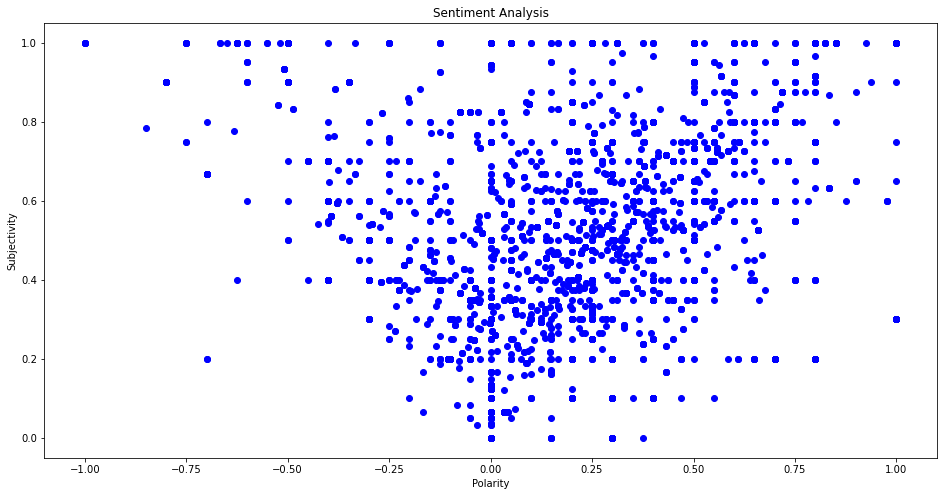

In [26]:
plt.figure(figsize=(16,8))
for i in range(0, tweets.shape[0]):
    plt.scatter(tweets['polarity'][i], tweets['subjectivity'][i], color='blue' )
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


##### Percentage of positive and negative tweets

In [27]:
ptweets = tweets[tweets.Analysis == 'Positive']
ptweets = ptweets['text']

print(ptweets)

0       : Want to know more about autism and anxiety? ...
2       : 130,000 patient years and the diagnostic sta...
4       : 130,000 patient years and the diagnostic sta...
7       130,000 patient years and the diagnostic stabi...
16      Many of us are likely to feel anxious or stres...
                              ...                        
6022    : What _members Yeonjun said is absolutely rig...
6023    : What _members Yeonjun said is absolutely rig...
6027    _Alias: 2/3\nI noticed something,though;w/each...
6029    wen i’m sad I literally got no one to talk to ...
6030       _a_mess_2020  Oh wow more stuff proving you...
Name: text, Length: 2776, dtype: object


In [28]:
round (  (ptweets.shape[0]/ tweets.shape[0])*100, 1)

46.0

In [29]:
ntweets = tweets[tweets.Analysis == 'Negative']
round (  (ntweets.shape[0]/ tweets.shape[0])*100, 1)

12.3

In [30]:
tweets['Analysis'].value_counts()

Positive    2776
Neutral     2513
Negative     743
Name: Analysis, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

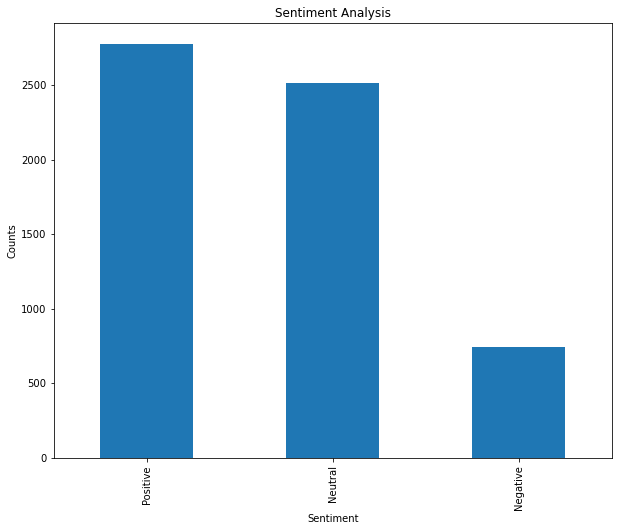

In [38]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

tweets['Analysis'].value_counts().plot(kind='bar', figsize=(10,8))


In [32]:
Fn = tweets[["Analysis", "label"]]

<AxesSubplot:xlabel='Analysis,label'>

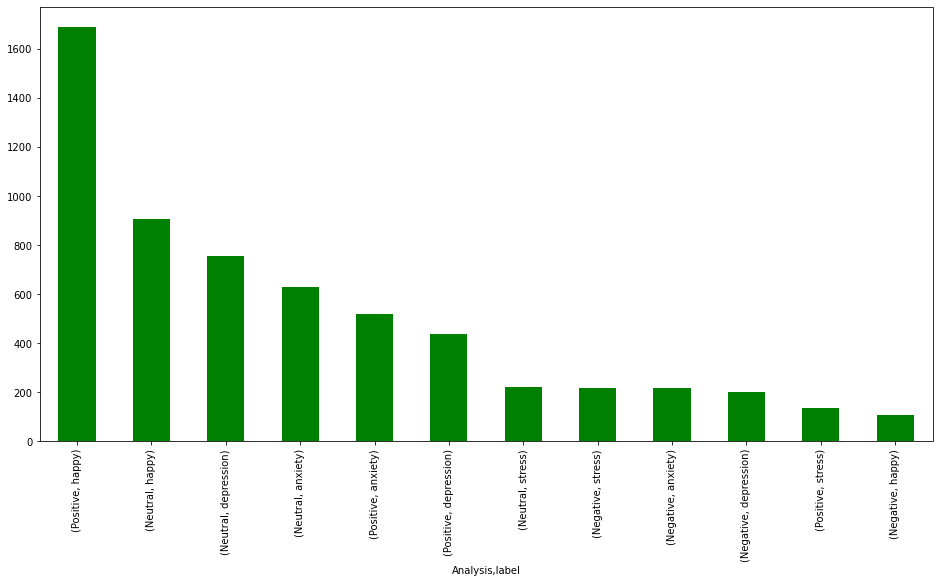

In [34]:
Fn.value_counts().plot(kind='bar', color = 'green', figsize=(16,8))
